# United States - Crime Rates - 1960 - 2014

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [2]:
crime = pd.read_csv('US_Crime_Rates_1960_2014.csv')

In [3]:
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [5]:
crime.Year = pd.to_datetime(crime.Year.astype(str), format='%Y')

### Step 6. Set the Year column as the index of the dataframe

In [6]:
crime.set_index(crime.Year.dt.year, drop=True, inplace=True)

In [16]:
crime.head()

,Year,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 7. Delete the Total column

In [7]:
del crime['Total']

In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1960 to 2014
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Violent             55 non-null     int64         
 3   Property            55 non-null     int64         
 4   Murder              55 non-null     int64         
 5   Forcible_Rape       55 non-null     int64         
 6   Robbery             55 non-null     int64         
 7   Aggravated_assault  55 non-null     int64         
 8   Burglary            55 non-null     int64         
 9   Larceny_Theft       55 non-null     int64         
 10  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 5.2 KB


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [9]:
crime.index[0:10]

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969], dtype='int64', name='Year')

In [10]:
crime[0:11].groupby(crime.index[0:11])

### Step 9. What is the most dangerous decade to live in the US?

In [11]:
crime.head()

,Year,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [12]:
total_by_year = crime.loc[:, 'Violent':'Vehicle_Theft'].apply(sum, axis=1)

In [13]:
import matplotlib.pyplot as plt

<BarContainer object of 55 artists>

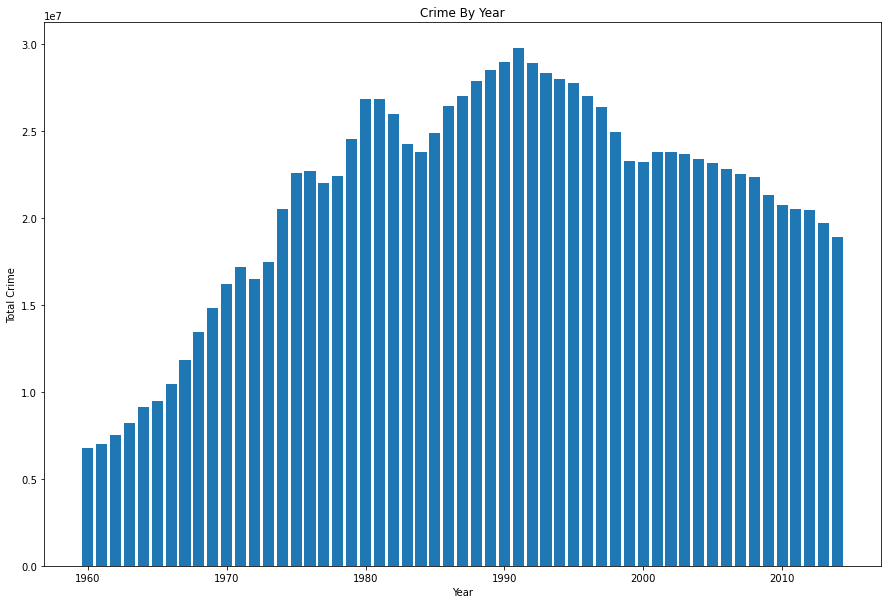

<Figure size 864x864 with 0 Axes>

In [14]:
fig, ax = plt.subplots()

plt.figure(figsize=(12, 12))
fig.set_figheight(10)
fig.set_figwidth(15)

# set title
ax.set_title('Crime By Year')
# set axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Total Crime')

# plot values
x = total_by_year.index
y = total_by_year.values

# rotate the xticklabels for better reading
#ax.set_xticklabels(x, rotation=40)
ax.bar(x, y)

In [15]:
crime.loc[:, 'Violent'].sum()

65384309